## Import libraries

In [1]:
from data_loader import DataLoader
from knn_classifier import KNearestNeighbours
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

## Load data

In [2]:
dataset_root_directory = './knn-dataset'
full_dataset = DataLoader.load_full_dataset(dataset_root_directory)
print('%d subsets of %d training examples with labels' % (len(full_dataset), len(full_dataset[0][0])))
print('Total %d training examples and labels' % (len(full_dataset)*len(full_dataset[0][0])))

10 subsets of 111 training examples with labels
Total 1110 training examples and labels


## Create and learn a model

In [3]:
model = KNearestNeighbours()

# Note that k is not passed here. The algorithm will learn the best k from data
model.learn(full_dataset, verbose=True)

Learning in progress...
At k = 1 Accuracy = 73.874
At k = 2 Accuracy = 73.874
At k = 3 Accuracy = 78.829
At k = 4 Accuracy = 78.649
At k = 5 Accuracy = 78.829
At k = 6 Accuracy = 79.099
At k = 7 Accuracy = 80.090
At k = 8 Accuracy = 80.090
At k = 9 Accuracy = 80.901
At k = 10 Accuracy = 81.441
At k = 11 Accuracy = 81.351
At k = 12 Accuracy = 81.171
At k = 13 Accuracy = 80.721
At k = 14 Accuracy = 80.721
At k = 15 Accuracy = 81.081
At k = 16 Accuracy = 80.991
At k = 17 Accuracy = 80.450
At k = 18 Accuracy = 80.811
At k = 19 Accuracy = 80.901
At k = 20 Accuracy = 81.351
At k = 21 Accuracy = 80.541
At k = 22 Accuracy = 81.622
At k = 23 Accuracy = 81.532
At k = 24 Accuracy = 81.532
At k = 25 Accuracy = 80.901
At k = 26 Accuracy = 81.171
At k = 27 Accuracy = 81.171
At k = 28 Accuracy = 80.811
At k = 29 Accuracy = 80.901
At k = 30 Accuracy = 80.721
Learned value of k = 22


## Plot k vs Accuracy

<IPython.core.display.Javascript object>


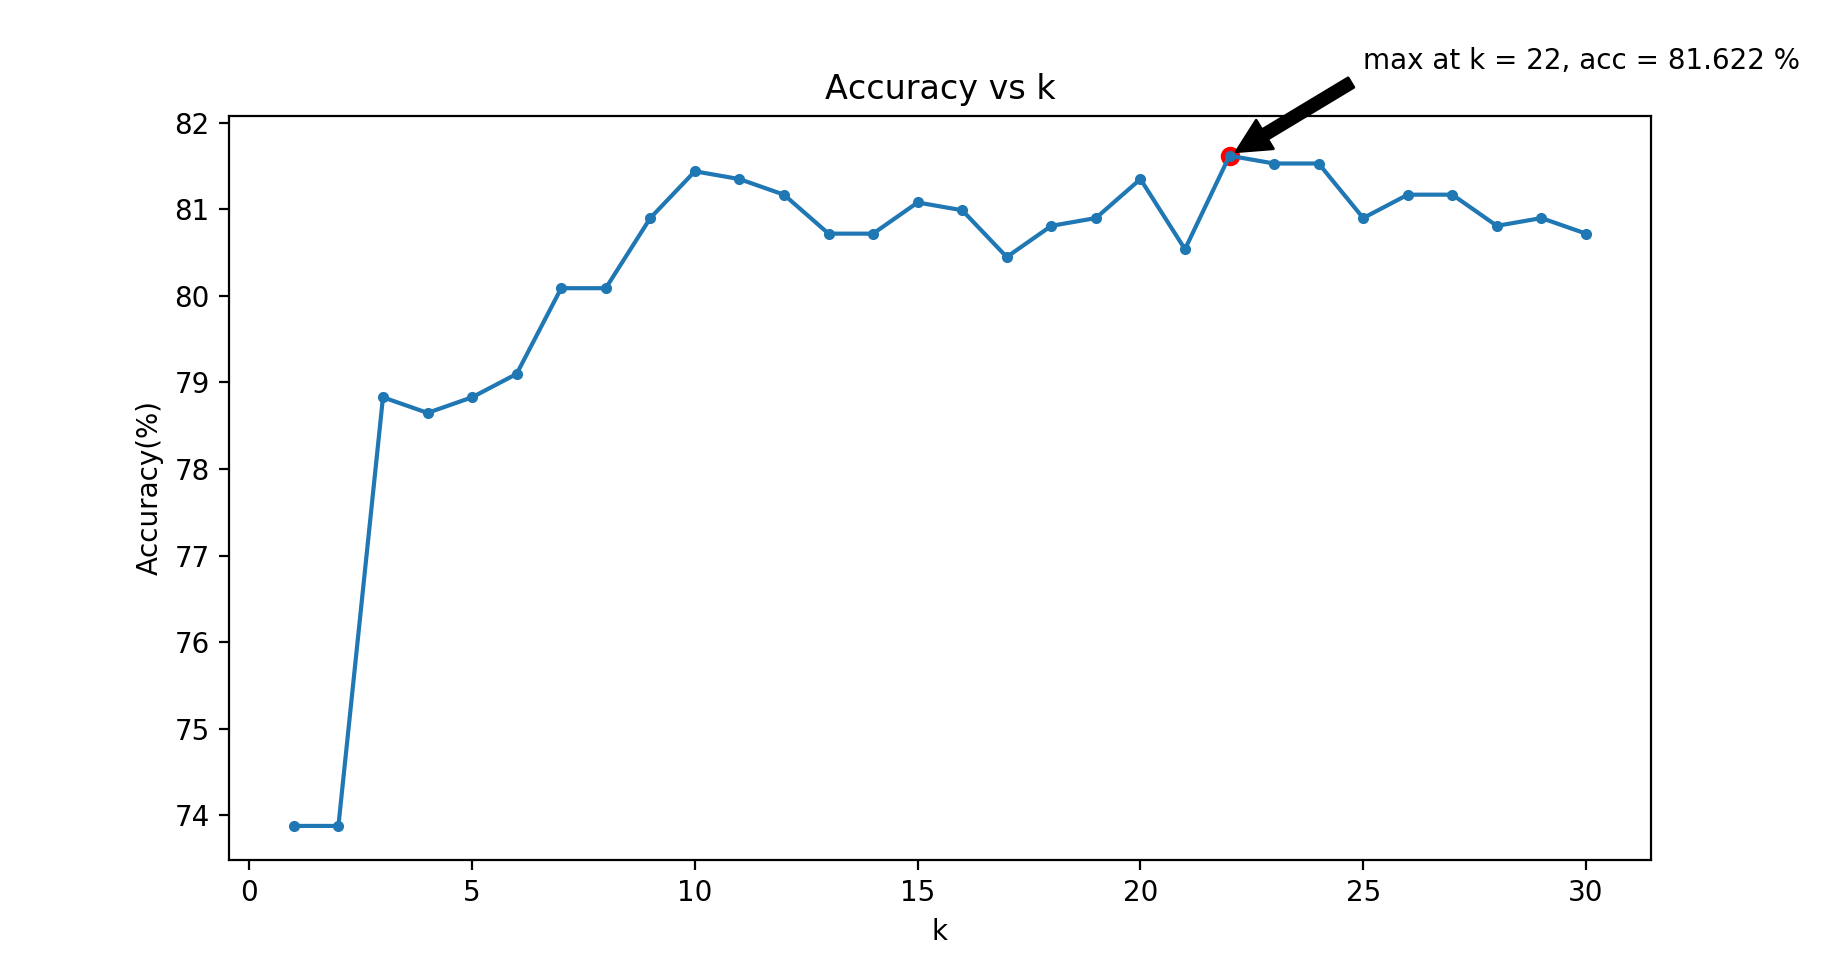

In [4]:
# This plot shows the algorithms learning of k using 10-fold cross validation
model.plot_accuracy()

## Test the model

In [7]:
# The model can now classify unseen test data in the future with the learned k value of 22.

# Since we do not have unseen test data, we will take a part of training data as test data and 
# test a newly trained model on remaining data as training data 

# To generate test data, we split the training data
train_dataset, test_attrs, test_labels = DataLoader.load_with_test_data(
                                                         dataset_root_directory,
                                                         split_ratio=0.1)
print(test_attrs.shape, 'testing examples')
print(test_labels.shape, 'testing labels')
print('%d subsets of %d training examples with labels' % (len(train_dataset), len(train_dataset[0][0])))
print('Total %d training examples and labels' % (len(train_dataset)*len(train_dataset[0][0])))

model = KNearestNeighbours()
# Note that k is not passed here. The algorithm will learn the best k from data
model.learn(train_dataset)
predicted_labels, accuracy = model.classify(train_dataset, test_attrs, true_values=test_labels)

print('\nAccuracy = %.3f %%' % accuracy)
print('\n=====Result( True label , Predicted lalue )=====')
for values in np.dstack((test_labels, predicted_labels)):
    #print('True label = ', values[0][0], 'Predicted label = ', values[0][1]) 
    print('(',values[0][0], ',', values[0][1], ')', end=' ')
    if values[0][0] != values[0][1]:
        print(' <--------Incorrect', end=' ')
    print()




(111, 64) testing examples
(111, 1) testing labels
9 subsets of 111 training examples with labels
Total 999 training examples and labels
Learning in progress...

Accuracy = 83.784 %

=====Result( True label , Predicted lalue )=====
( 6.0 , 6.0 ) 
( 5.0 , 5.0 ) 
( 6.0 , 6.0 ) 
( 5.0 , 6.0 )  <--------Incorrect 
( 6.0 , 6.0 ) 
( 6.0 , 6.0 ) 
( 6.0 , 6.0 ) 
( 6.0 , 5.0 )  <--------Incorrect 
( 5.0 , 5.0 ) 
( 6.0 , 6.0 ) 
( 6.0 , 6.0 ) 
( 5.0 , 6.0 )  <--------Incorrect 
( 5.0 , 5.0 ) 
( 6.0 , 6.0 ) 
( 6.0 , 6.0 ) 
( 6.0 , 6.0 ) 
( 6.0 , 6.0 ) 
( 5.0 , 5.0 ) 
( 5.0 , 5.0 ) 
( 5.0 , 5.0 ) 
( 6.0 , 5.0 )  <--------Incorrect 
( 6.0 , 6.0 ) 
( 6.0 , 6.0 ) 
( 5.0 , 5.0 ) 
( 6.0 , 6.0 ) 
( 6.0 , 6.0 ) 
( 6.0 , 6.0 ) 
( 5.0 , 6.0 )  <--------Incorrect 
( 5.0 , 5.0 ) 
( 5.0 , 5.0 ) 
( 5.0 , 5.0 ) 
( 6.0 , 6.0 ) 
( 5.0 , 5.0 ) 
( 5.0 , 5.0 ) 
( 5.0 , 5.0 ) 
( 5.0 , 5.0 ) 
( 5.0 , 5.0 ) 
( 5.0 , 5.0 ) 
( 5.0 , 5.0 ) 
( 6.0 , 6.0 ) 
( 6.0 , 6.0 ) 
( 5.0 , 5.0 ) 
( 6.0 , 6.0 ) 
( 5.0 , 5.0 ) 
( 5.0 , 